In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pathlib import Path 
import numpy as np   
import matplotlib.pyplot as plt
import pandas as pd

import sys
import os

cwd = os.getcwd()
# print(f"Working dir: {cwd}")
module_path = os.path.abspath(Path(cwd).parents[2])
# print(f"Module dir: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.tools.utils import load_yaml, get_tensorboard_logs

import seaborn as sns

sns.set(font_scale=1.2)
sns.set_palette("Set2")

In [4]:
exp_dir = os.path.join(module_path, "experiments", "exp14-1")
Path(os.path.join(module_path, "reports", "figures", "plantseg")).mkdir(parents=True, exist_ok=True)   # create dir to save figures
Path(os.path.join(module_path, "reports", "figures", "plantseg", "training_logs")).mkdir(parents=True, exist_ok=True)   # create dir to save logs

In [35]:
df = pd.read_csv(r"C:\Users\lazi257c\Downloads\run-.-tag-train_loss_avg.csv")

In [38]:
val = pd.read_csv(r"C:\Users\lazi257c\Downloads\run-.-tag-val_loss_avg.csv")

In [40]:
val

,Wall time,Step,Value
0,1.657884e+09,100,1.397420
1,1.657884e+09,200,1.388177
2,1.657885e+09,300,1.388245
3,1.657885e+09,400,1.383994
4,1.657886e+09,500,1.383185
...,...,...,...
95,1.657950e+09,9600,1.361896
96,1.657951e+09,9700,1.361116
97,1.657951e+09,9800,1.361211
98,1.657952e+09,9900,1.361034


In [36]:
df

,Wall time,Step,Value
0,1.657884e+09,100,0.601043
1,1.657884e+09,200,0.515157
2,1.657885e+09,300,0.464710
3,1.657885e+09,400,0.445418
4,1.657886e+09,500,0.432478
...,...,...,...
95,1.657950e+09,9600,0.234455
96,1.657951e+09,9700,0.233988
97,1.657951e+09,9800,0.234075
98,1.657952e+09,9900,0.234304


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 5)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
df.plot(x="Step", y="Value", legend=False, ax = ax1)
val.plot(x="Step", y="Value", legend=False, ax = ax2, colormap='summer')
ax1.set_ylabel('Metric value')
ax1.legend(labels=["Train loss"], frameon=False)
ax2.legend(labels=["Validation loss"], frameon=False)
ax2.set_ylabel('Metric value')
plt.savefig(os.path.join(module_path, "reports", "figures", "Plantseg", "training_logs", "plantseg_train_loss_plots.png"), bbox_inches='tight')

In [53]:
eval_train= pd.read_csv(r"C:\Users\lazi257c\Downloads\run-.-tag-train_eval_score_avg.csv")

In [54]:
eval_val= pd.read_csv(r"C:\Users\lazi257c\Downloads\run-.-tag-val_eval_score_avg.csv")

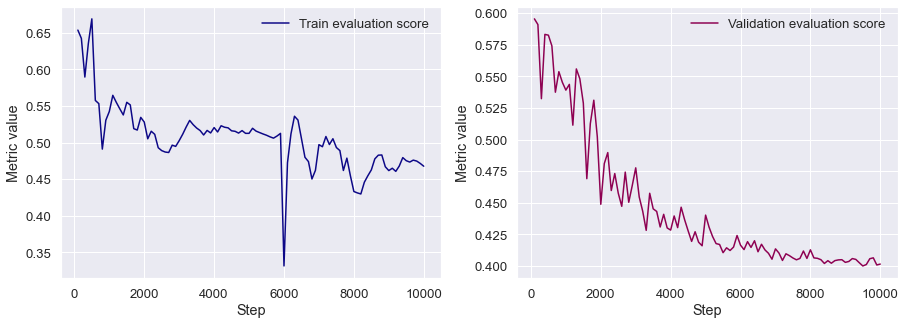

In [75]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 5)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
eval_train.plot(x="Step", y="Value", legend=True, ax = ax1, colormap='plasma')
ax1.set_ylabel('Metric value')
ax1.legend(labels=["Train evaluation score"], frameon=False)
eval_val.plot(x="Step", y="Value", legend=True, ax = ax2, colormap='PiYG')
ax2.legend(labels=["Validation evaluation score"], frameon=False)
ax2.set_ylabel('Metric value')
plt.savefig(os.path.join(module_path, "reports", "figures", "Plantseg", "training_logs", "plantseg_eval_train_plots.png"), bbox_inches='tight')